In [151]:
### Repetir esto mismo pero en circuitos...


In [3]:
import pandas as pd

In [4]:
# ## Los circuitos vienen identificados por las siguientes columnas
# gr_circuito = ['distrito_id', 'circuito_id']
# gr_seccion = ['distrito_id', 'seccion_id']

# ## Las elecciones vienen identificadas por lo siguiente:
# gr_eleccion = ['Año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo']

# gr_secprov = ['seccionprovincial_id']

# ## Columnas cargo y agrupacion
# gr_cargo = ['cargo_id', 'cargo_nombre']
# gr_agrup = ['agrupacion_id', 'agrupacion_nombre']
# votos_cols = ['votos_tipo', 'votos_cantidad']

In [6]:
elecciones_ppales = pd.read_csv('./../datos/out/elecciones_ppales.csv')
elecciones_ppales

,año,eleccion_tipo,recuento_tipo,padron_tipo,cargo_id,cargo_nombre
0,2011,GENERAL,PROVISORIO,NORMAL,1,PRESIDENTE
1,2013,GENERAL,PROVISORIO,NORMAL,3,DIPUTADOS NACIONALES
2,2015,BALLOTAGE,PROVISORIO,NORMAL,1,PRESIDENTE
3,2015,GENERAL,PROVISORIO,NORMAL,1,PRESIDENTE
4,2015,GENERAL,PROVISORIO,NORMAL,3,DIPUTADOS NACIONALES
5,2015,GENERAL,PROVISORIO,NORMAL,8,PARLAMENTARIOS MERCOSUR NACIONALES
6,2015,GENERAL,PROVISORIO,NORMAL,9,PARLAMENTARIOS MERCOSUR PROVINCIALES
7,2015,PASO,PROVISORIO,NORMAL,1,PRESIDENTE
8,2017,GENERAL,PROVISORIO,NORMAL,3,DIPUTADOS NACIONALES
9,2017,PASO,PROVISORIO,NORMAL,3,DIPUTADOS NACIONALES


In [7]:
# elecciones_ppales.merge(votos_tipo_dpto, how = 'left')

In [10]:


votos_tipo_circ = pd.read_csv('./../datos/out/votos_tipo_circ.csv')

df1 = elecciones_ppales.merge(votos_tipo_circ, how = 'left')#.set_index(gr_eleccion + gr_cargo + gr_seccion)


electores_circ = pd.read_csv('./../datos/out/n_electores_circ.csv')
df2 = elecciones_ppales.merge(electores_circ, how = 'left')

df = pd.concat([df1, df2])

df['votos_tipo'] = df['votos_tipo'].fillna('ELECTORES')
df['votos_cantidad_sum'] = df['votos_cantidad_sum'].fillna(df.mesa_electores_sum)

df = df.drop(['mesa_electores_sum'], axis = 1)


MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [8]:
# votos_tipo_dpto

In [9]:
# proy_pop = pd.read_csv('./../datos/proy_pop200125.csv', index_col=0)

radio_ref = pd.read_csv('./../datos/radio_ref.csv', index_col=0) 
p02 = pd.read_csv('./../datos/PERSONA-P02.csv', index_col=0, encoding = 'latin-1')
radios = radio_ref.merge(p02.reset_index())

dptos_p2010 = radios.groupby(['DPTO', 'NOMDPTO', 'NOMPROV'])[p02.columns].sum().reset_index()

In [10]:
df.columns

Index(['Año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'cargo_id',
       'cargo_nombre', 'distrito_id', 'circuito_id', 'votos_tipo',
       'seccion_id', 'seccionprovincial_id', 'votos_cantidad_size',
       'votos_cantidad_sum', 'mesa_electores_size'],
      dtype='object')

In [11]:
# secciones_departamentos = pd.read_csv('./../datos/secciones_departamentos-TTGL.csv')
# # secciones_departamentos = pd.read_csv('./../datos/

In [161]:
# corregir_nombres = {'Comuna 1': 'Comuna 01',
#  'Comuna 2': 'Comuna 02',
#  'Comuna 3': 'Comuna 03',
#  'Comuna 4': 'Comuna 04',
#  'Comuna 5': 'Comuna 05',
#  'Comuna 6': 'Comuna 06',
#  'Comuna 7': 'Comuna 07',
#  'Comuna 8': 'Comuna 08',
#  'Comuna 9': 'Comuna 09',
#  'Coronel De Marina L. Rosales': 'Coronel Rosales',
#  'General La Madrid': 'General Lamadrid',
#  'General Las Heras': 'Las Heras',
#  'General Juan Madariaga': 'General Madariaga',
#  'Adolfo Gonzales Chaves': 'Gonzales Chaves',
#  'Guaminí': 'Guamini',
#  'Benito Juárez': 'Juárez',
#  'Matanza': 'La Matanza',
#  'Lobería': 'Loberia',
#  '9 De Julio': 'Nueve De Julio',
#  'Puán': 'Puan',
#  'Trenque Lauquen': 'Trenque Lauquén',
#  '25 De Mayo': 'Veinticinco De Mayo',
#  'Florentino Ameghino': 'F. Ameghino',
#  'José C. Paz': 'J. C. Paz',
#  'Ituzaingó': 'Ituzaingo',
#  'Capayán': 'Capayan',
#  'Paclín': 'Paclin',
#  'Ischilín': 'Ischilin',
#  'Presidente Roque Sáenz Peña': 'Roque Sáenz Peña',
#  'Mburucuyá': 'Mburucuya',
#  'Itatí': 'Itati',
#  '1º De Mayo': 'Primero De Mayo',
#  'Presidencia De La Plaza': 'Pcia. De La Plaza',
#  'Presidencia De La  Plaza': 'Pcia. De La Plaza',
#  'Libertador General San Martín': 'San Martín',
#  'Libertador Gral. San Martín': 'Lib. Gral. San Martín',
#  'Tapenagá': 'Tapenaga',
#  'Mayor Luis J. Fontana': 'Mayor L. J. Fontana',
#  'Fray Justo Santa María De Oro': 'Fray J. Sta. María De Oro',
#  'Fray Justo Sta. María De Oro': 'Fray J. Sta. María De Oro',
#  'Paso De Los Indios': 'Paso De Indios',
#  'Río Senger': 'Río Senguer',
#  'Laishí': 'Laishi',
#  'Pilagás': 'Pilagas',
#  'Dr. Manuel Belgrano': 'General Belgrano',
#  'Atreucó': 'Atreuco',
#  'Chapaleufú': 'Chapaleufu',
#  'Chical Co': 'Chical-Co',
#  'Chical Có': 'Chical-Co',
#  'Curacó': 'Curaco',
#  'Guatraché': 'Guatrache',
#  'Loventué': 'Loventue',
#  'Maracó': 'Maraco',
#  'Puelén': 'Puelen',
#  'Quemú Quemú': 'Quemu Quemu',
#  'Coronel Felipe Varela': 'Felipe Varela',
#  'General Angel Vicente Peñaloza': 'Angel Vicente Peñaloza',
#  'Ángel Vicente Peñaloza': 'Angel Vicente Peñaloza',
#  'General Juan Facundo Quiroga': 'Juan Facundo Quiroga',
#  'Luján De Cuyo': 'Luján',
#  'Malargüe': 'Malargue',
#  'Concepción': 'Concepción De La Sierra',
#  'Cainguás': 'Cainguas',
#  'Eldorado': 'El Dorado',
#  'General Manuel Belgrano': 'Gral. Manuel Belgrano',
#  'Catán Lil': 'Catan Lil',
#  'Collón Curá': 'Collon Curá',
#  'San Antonio': 'San Antonio Oeste',
#  'General José San Martín': 'San Martín',
#  'General José De San Martín': 'San Martín',
#  'Santa Lucia': 'Santa Lucía',
#  'Ullum': 'Ullúm',
#  'Juan Martín De Pueyrredón': 'Pueyrredon',
#  'Pueyrredón': 'Pueyrredon',
#  'Coronel Pringles': 'Pringles',
#  'General Pedernera': 'Pedernera',
#  'Villa Constitución': 'Constitución',
#  'Matara': 'Juan F. Ibarra',
#  'Silípica': 'Silipica',
#  'General Taboada': 'Taboada',
#  'Juan B. Alberdi': 'Alberdi',
#  'Juan Bautista Alberdi': 'Alberdi',
#  'Burruyacú': 'Burruyacu'}

In [13]:
pd.options.display.max_rows = 100

In [14]:
# ## DEBUG. NOMDPTOS

# ref = df1[['distrito_id', 'seccion_id', 'seccion_nombre']].drop_duplicates()
# ref['seccion_nombre'] = ref['seccion_nombre'].replace(corregir_nombres)
# ref = ref.drop_duplicates()

# ref = ref.merge(secciones_departamentos, left_on = ['distrito_id', 'seccion_id'],
# right_on = ['codprov', 'seccion_id'], how = 'inner')

# # Estas son las diferencias.
# diferencias = ref.loc[ref.seccion_nombre != ref.NOMDPTO]

# # Principalmen/te hay problema con san juan y misiones
# # diferencias.groupby(['codprov']).size()
# # diferencias

# # fix14 = diferencias.loc[diferencias.distrito_id == 14].to_csv('./fix14.csv')
# # fix18 = diferencias.loc[diferencias.distrito_id == 18].to_csv('./fix18.csv')

# # diferencias.loc[diferencias.distrito_id == 14]

# diferencias

KeyError: "['seccion_nombre'] not in index"

In [27]:


m = df#.merge(secciones_departamentos, left_on = ['distrito_id', 'seccion_id'],
# right_on = ['codprov', 'seccion_id'], how = 'inner')

electores_dpto = m.groupby(gr_eleccion + gr_cargo + gr_circuito + ['votos_tipo'])[['votos_cantidad_sum']].sum()

df_ = electores_dpto.unstack('votos_tipo')['votos_cantidad_sum'].reset_index()
# df_.groupby('DPTO').nunique()

In [28]:
df_.head()

votos_tipo,Año,eleccion_tipo,recuento_tipo,padron_tipo,cargo_id,cargo_nombre,distrito_id,circuito_id,0,ELECTORES,IMPUGNADO,NULO,POSITIVO,RECURRIDO
0,2013,GENERAL,PROVISORIO,NORMAL,3,DIPUTADOS NACIONALES,1,0,112405.0,2555641.0,742.0,18341.0,1781885.0,1321.0
1,2013,GENERAL,PROVISORIO,NORMAL,3,DIPUTADOS NACIONALES,2,0,327631.0,8378883.0,2091.0,64961.0,6258757.0,3565.0
2,2013,GENERAL,PROVISORIO,NORMAL,3,DIPUTADOS NACIONALES,2,00018A,2322.0,47691.0,6.0,465.0,37283.0,20.0
3,2013,GENERAL,PROVISORIO,NORMAL,3,DIPUTADOS NACIONALES,2,00020A,1447.0,26293.0,0.0,216.0,20265.0,12.0
4,2013,GENERAL,PROVISORIO,NORMAL,3,DIPUTADOS NACIONALES,2,00021A,282.0,10424.0,0.0,72.0,8241.0,1.0


In [29]:
nomprovs = radio_ref[['DPTO', 'NOMDPTO', 'PROV', 'NOMPROV']].drop_duplicates().reset_index(drop = True)

In [30]:
data = df_#.merge(dptos_p2010[['DPTO', '1 Varón', '2 Mujer', 'TOTAL']])
# data = data.loc[data['Año'] == 2015]


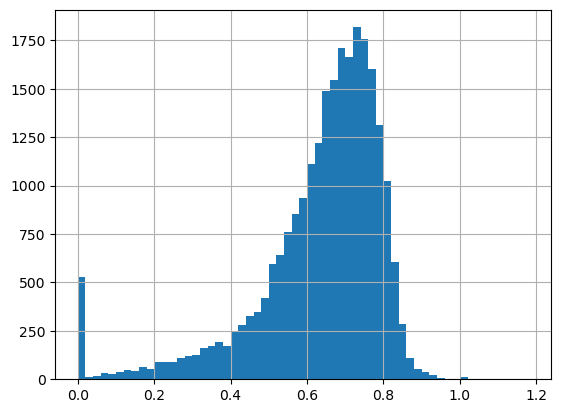

In [31]:
import numpy as np

data['electores_proportion'] = data['POSITIVO']/ data['ELECTORES']

(data['electores_proportion']).hist(bins = np.arange(0, 1.2, .02))

## Listar los departamentos con menos de X% de electores. (outliers)
outliers = data.loc[data.electores_proportion > 1.1]#.merge(dptos_p2010).set_index(gr_eleccion)
# nomprovs.loc[nomprovs.DPTO.isin(outliers.DPTO.unique())]

In [80]:
pd.options.display.max_rows = 200

import matplotlib.pyplot as plt

In [89]:
# # tabla = data.loc[(data.distrito_id == 17)].groupby(gr_eleccion + ['circuito_id'])['POSITIVO'].sum().unstack(gr_eleccion)
# tabla = data.groupby(gr_eleccion + gr_cargo + ['distrito_id', 'circuito_id']).sum()
# tabla_pos = tabla['POSITIVO'].unstack(gr_eleccion + gr_cargo )
# tabla_ele = tabla['ELECTORES'].unstack(gr_eleccion + gr_cargo )
# # tabla_ele = data.groupby(gr_eleccion + ['distrito_id', 'circuito_id'])['POSITIVO'].sum().unstack(gr_eleccion)

# problema = tabla_pos.loc[tabla_pos.fillna(0).min(1) == 0]

# plt.imshow(problema.values)
# # problema.loc[problema.mean(1) > 1e4]#.fillna('')
# # # tabla.fillna(0).min(1).min()

# ####

tabla = data.loc[data.electores_proportion == 0].groupby(gr_eleccion + gr_cargo + ['distrito_id', 'circuito_id']).sum()
tabla_pos = tabla['POSITIVO'].unstack(gr_eleccion + gr_cargo )
tabla_ele = tabla['ELECTORES'].unstack(gr_eleccion + gr_cargo )

# data.loc[data.electores_proportion == 0].groupby(['distrito_id', 'circuito_id'])['ELECTORES'].sum()

tabla_ele
# plt.imshow(tabla_ele.values)
tabla_pos.loc[tabla_ele.sum(1) > 1e3]
## Parece que son circuitos que entraron y salieron pero por alguna razon se les puso 0 votos positivos. Solo tienen electores...


Año                                     2013       2015             \
eleccion_tipo                        GENERAL  BALLOTAGE    GENERAL   
recuento_tipo                     PROVISORIO PROVISORIO PROVISORIO   
padron_tipo                           NORMAL     NORMAL     NORMAL   
cargo_id                                   3          1          1   
cargo_nombre            DIPUTADOS NACIONALES PRESIDENTE PRESIDENTE   
distrito_id circuito_id                                              
4           00004F                       NaN        NaN        NaN   
            00013O                       NaN        NaN        NaN   
7           00036A                       NaN        NaN        NaN   
9           00064A                       0.0        NaN        NaN   
            00083A                       0.0        NaN        NaN   
10          00071A                       0.0        NaN        NaN   
            00071B                       0.0        NaN        NaN   
            00073A                       0.0        NaN        NaN   
            00100A                       NaN        NaN        NaN   
17          00026B                       NaN        NaN        NaN   
            00027A                       NaN        NaN        NaN   
            00027C                       0.0        NaN        NaN   
            00028A                       NaN        NaN        NaN   
            00028B                       NaN        NaN        NaN   
            00028E                       NaN        NaN        NaN   
            00028F                       NaN        NaN        NaN   
            00029A                       0.0        NaN        NaN   
            00029C                       NaN        NaN        NaN   
            00029F                       NaN        NaN        NaN   
            00029G                       NaN        NaN        NaN   
            00029H                       0.0        NaN        NaN   
            00029I                       NaN        NaN        NaN   
            00044D                       NaN        NaN        NaN   
            00046A                       NaN        NaN        NaN   
            00046D                       0.0        NaN        NaN   
            00049A                       NaN        NaN        NaN   
            00049G                       0.0        NaN        NaN   
            00049J                       NaN        NaN        NaN   
            00051A                       NaN        NaN        NaN   
21          00379B                       0.0        NaN        NaN   
22          00126A                       NaN        NaN        NaN   

Año                                           \
eleccion_tipo                                  
recuento_tipo                                  
padron_tipo                                    
cargo_id                                   3   
cargo_nombre            DIPUTADOS NACIONALES   
distrito_id circuito_id                        
4           00004F                       NaN   
            00013O                       NaN   
7           00036A                       NaN   
9           00064A                       NaN   
            00083A                       NaN   
10          00071A                       NaN   
            00071B                       NaN   
            00073A                       NaN   
            00100A                       NaN   
17          00026B                       NaN   
            00027A                       NaN   
            00027C                       NaN   
            00028A                       NaN   
            00028B                       NaN   
            00028E                       NaN   
            00028F                       NaN   
            00029A                       NaN   
            00029C                       NaN   
            00029F                       NaN   
            00029G                       NaN   
            00029H                       Na

In [82]:
problema.shape

(535, 16)

In [42]:
## Problema con votos faltantes...
# data.electores_proportion == 0

# data.groupby(data.electores_proportion == 0)['ELECTORES'].describe()


In [169]:
import statsmodels.api as sm
import pandas as pd

# Calculate proportions
data['male_proportion'] = data['1 Varón'] / data['TOTAL']
data['female_proportion'] = data['2 Mujer'] / data['TOTAL']
data['positivo_proportion'] = data['POSITIVO'] / data['ELECTORES']

# Fit logistic regression model
X = data[['male_proportion', 'female_proportion']]
X = sm.add_constant(X)
y = data['positivo_proportion']


In [170]:
# data

/home/matias/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='male_proportion', ylabel='positivo_proportion'>

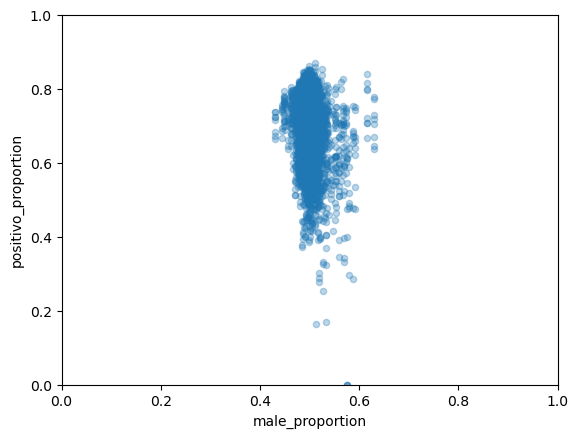

In [171]:
data.plot(x = 'male_proportion', y = 'positivo_proportion', kind = 'scatter', alpha = .3,
xlim=(0, 1), ylim=(0, 1))

In [ ]:
logit_model = sm.Logit(y, X).fit()
display(logit_model.summary())

male_coef = logit_model.params[1]
female_coef = logit_model.params[2]

import scipy.stats as st

male_prob = st.norm.cdf(male_coef)
female_prob = st.norm.cdf(female_coef)

prob_diff = male_prob - female_prob

print(f"From the parameters in the regression, we estimate that males have {male_prob * 100:.2f}% chances of casting a vote while females have {female_prob * 100:.2f}%.")

Optimization terminated successfully.
         Current function value: 0.497943
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     positivo_proportion   No. Observations:                  525
Model:                           Logit   Df Residuals:                      523
Method:                            MLE   Df Model:                            1
Date:                 Thu, 09 Feb 2023   Pseudo R-squ.:                  -3.435
Time:                         20:36:44   Log-Likelihood:                -261.42
converged:                        True   LL-Null:                       -58.951
Covariance Type:             nonrobust   LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6551        nan        nan        nan         nan         nan
male_proportion      -0.7206        nan        nan        nan         nan         nan
female_proportion     1.3757        nan        nan        nan         nan         nan
=====================================================================================
"""

From the parameters in the regression, we estimate that males have 23.56% chances of casting a vote while females have 91.55%.


<AxesSubplot: xlabel='Año,eleccion_tipo,recuento_tipo,padron_tipo,cargo_id,cargo_nombre'>

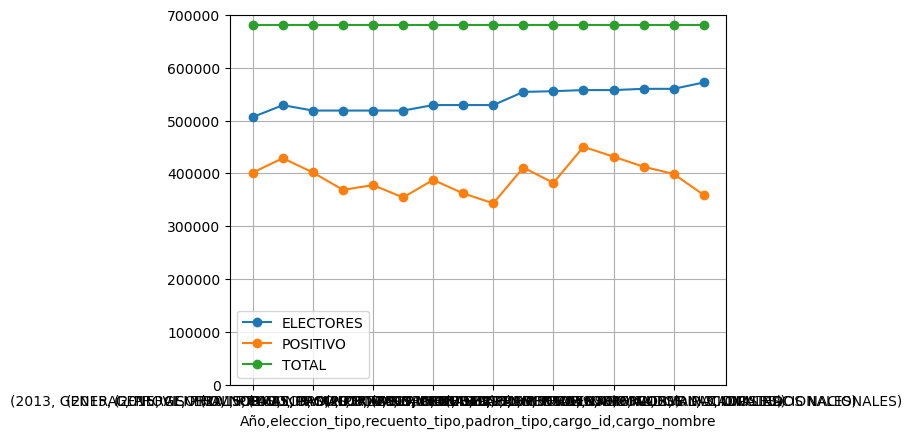

<AxesSubplot: xlabel='Año,eleccion_tipo,recuento_tipo,padron_tipo,cargo_id,cargo_nombre'>

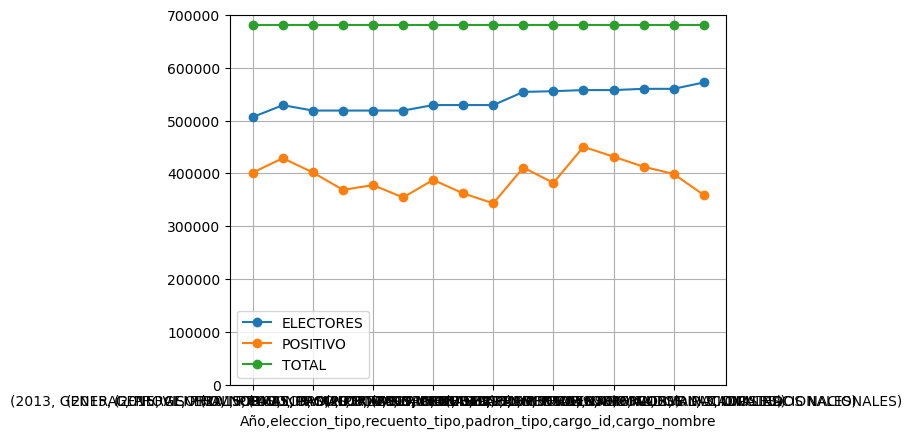

In [ ]:
## Que pasa en San Juan??
## Parece que los ID de depto estuvieran mal en la data original .i.e. Rawson no tiene electores pero deberia ser el depto mas poblado.


data = df_.merge(dptos_p2010[['DPTO', 'NOMDPTO', 'NOMPROV', '1 Varón', '2 Mujer', 'TOTAL']])
# data.groupby(gr_eleccion).sum()

san_juan = data.loc[data.NOMPROV == 'San Juan'].groupby(gr_eleccion + gr_cargo ).sum()
san_juan[['ELECTORES', 'POSITIVO', 'TOTAL']].plot(ylim=(0, 700000), marker = 'o', grid=True)

import numpy as np
san_juan = data.loc[data.NOMPROV == 'San Juan'].groupby(gr_eleccion + gr_cargo + ['DPTO', 'NOMDPTO', 'seccion_nombre']).sum()[['ELECTORES', 'TOTAL']]
(san_juan['ELECTORES']/san_juan['TOTAL']).hist(bins=np.arange(0, 2, .02))

# .unstack(gr_eleccion + ['DPTO', 'NOMDPTO'])

In [ ]:
# san_juan

ELECTORES  \
Año  eleccion_tipo recuento_tipo padron_tipo cargo_id cargo_nombre         DPTO  NOMDPTO                   
2013 GENERAL       PROVISORIO    NORMAL      3        DIPUTADOS NACIONALES 70007 Albardón        94596.0   
                                                                           70014 Angaco          38034.0   
                                                                           70021 Calingasta      57045.0   
                                                                           70028 Capital         63171.0   
                                                                           70035 Caucete          3549.0   
...                                                                                                  ...   
2021 PASO          PROVISORIO    NORMAL      3        DIPUTADOS NACIONALES 70105 Sarmiento       30513.0   
                                                                           70112 Ullum            6602.0   
                                                                           70119 Valle Fértil    19371.0   
                                                                           70126 25 de Mayo       7343.0   
                                                                           70133 Zonda            8298.0   

                                                                                                TOTAL  
Año  eleccion_tipo recuento_tipo padron_tipo cargo_id cargo_nombre         DPTO  NOMDPTO               
2013 GENERAL       PROVISORIO    NORMAL      3        DIPUTADOS NACIONALES 70007 Albardón       23888  
                                                                           70014 Angaco          8125  
                                                                           70021 Calingasta      8588  
                                                                           70028 Capital       109123  
                                                                           70035 Caucete        38343  
...                                                                                               ...  
2021 PASO          PROVISORIO    NORMAL      3        DIPUTADOS NACIONALES 70105 Sarmiento      22131  
                                                                           70112 Ullum           4886  
                                                                           70119 Valle Fértil    7222  
                                                                           70126 25 de Mayo     17119  
                                                                           70133 Zonda           4863  

[304 rows x 2 columns]

In [ ]:

xx

In [ ]:
# table = san_juan.unstack(gr_eleccion + gr_cargo)
# x = table.iloc[:,  0].sort_values()
# y = table.iloc[:, -1].sort_values()

In [ ]:
# sorter = ('ELECTORES', 2013, 'GENERAL', 'PROVISORIO', 'NORMAL', 3, 'DIPUTADOS NACIONALES')
# sorter = ('TOTAL', 2021, 'PASO', 'PROVISORIO', 'NORMAL', 3, 'DIPUTADOS NACIONALES')
# pd.concat([x, y], axais = 1).sort_values(sorter).to_csv('test_2.csv')

In [ ]:
# import matplotlib.pyplot as plt

# fig, axs = plt.subplots(1, figsize=(10, 10))

# x.plot(ax = axs)
# y.plot(ax = axs)


In [ ]:
# p2010 = dptos_p2010.set_index('DPTO')['TOTAL']
# electores = df.set_index(gr_eleccion).unstack(gr_eleccion)
# yrs = electores.columns.get_level_values(u'Año').astype(str).unique()
# proy_pop_ = proy_pop[list(yrs.values)]

In [ ]:
# votos_tipo = df.groupby(gr_eleccion + gr_cargo + gr_seccion + ['votos_tipo'])['votos_cantidad_sum'].sum().unstack('votos_tipo')
# votos_tipo[['ELECTORES', 'POSITIVO']]